In [22]:
from sklearn.decomposition import PCA

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('train.csv')

In [25]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29307,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.shape

(30402, 785)

In [27]:
df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,1
pixel780,1
pixel781,1
pixel782,1


In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [30]:
df.shape

(30401, 785)

In [32]:
X = df.drop(columns=('label'), axis=1)
y = df['label']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing Standard Scaler

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_trans = sc.fit_transform(X_train)
X_test_trans = sc.transform(X_test)

# Performing PCA

In [35]:
pca = PCA(n_components=100)

X_train_pca = pca.fit_transform(X_train_trans)
X_test_pca = pca.transform(X_test_trans)

In [36]:
print('Original dimensions:', X_train.shape)
print('After PCA:', X_train_pca.shape)

Original dimensions: (24320, 784)
After PCA: (24320, 100)


In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=500
)

In [39]:
model.fit(X_train_pca, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [40]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9123499424436771


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


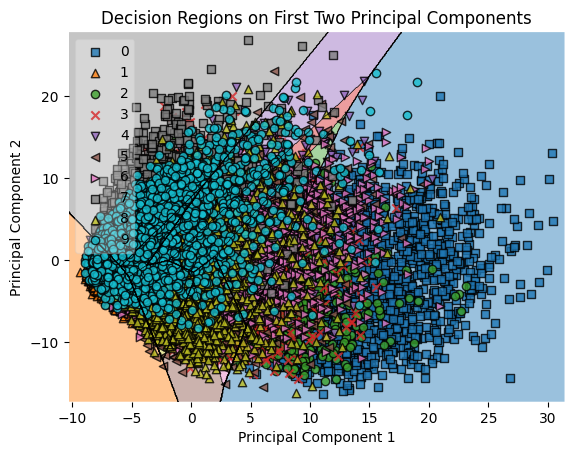

In [46]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_trans)
X_test_pca_2d = pca_2d.transform(X_test_trans)

model_2d = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=500
)
model_2d.fit(X_train_pca_2d, y_train)

plot_decision_regions(X_train_pca_2d, y_train.values, clf=model_2d, legend=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Regions on First Two Principal Components')
plt.show()